# Extract Contour of mesh

Extraction of contour is generating polygon coordinates of the external boundaries of a mesh with or without boundary condition file

It returns a list of list of tuples
wich contains coordinates (with the first point repeated at the end) of external contour sorted clockwise and holes in the external contour sorted anticlockwise.

The script can generate a GIS file with fiona in several formats (shapefile, geopackage, geojson, etc.).

It can handle "islands" and separated domains

All the examples below can be done using the one line command **run_telfile.py contour**

In [1]:
!run_telfile.py contour -h



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

usage: run_telfile.py contour [-h] Telemac File shp_file

positional arguments:
  Telemac File  Mesh file
  shp_file      Shapefile

optional arguments:
  -h, --help    show this help message and exit


## 1. example with islands (pildepon test-case)

In [2]:
import os
from pretel.extract_contour import extract_contour, write_gis_file

geo_file_path = os.path.join(os.environ['HOMETEL'], 
                                        'examples',
                                        'telemac2d',
                                        'pildepon',
                                        'geo_pildepon.slf')

shp_file = "geo_pildepon.shp"

domains_bnd = extract_contour(geo_file_path)

write_gis_file(domains_bnd, shp_file)


In [3]:
for file in os.listdir():
    if file == shp_file: print(file)

geo_pildepon.shp


Geopandas can be used to plot the GIS file

<AxesSubplot: >

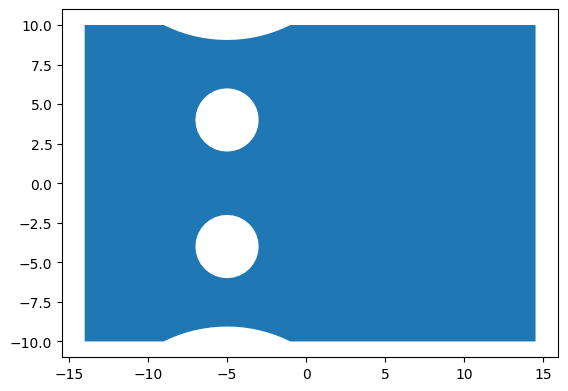

In [4]:
import geopandas as gp

boundaries = gp.read_file(shp_file)
boundaries.plot()


## 2. example with separated domains (weirs test-case)

<AxesSubplot: >

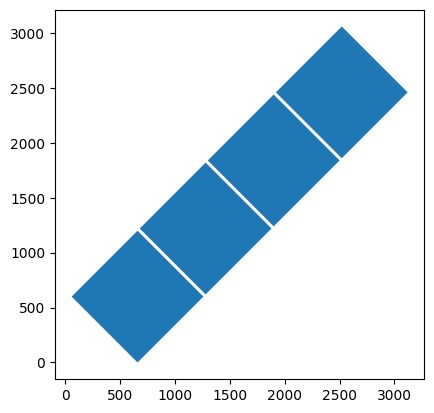

In [5]:
geo_file_path = os.path.join(os.environ['HOMETEL'], 
                                        'examples',
                                        'telemac2d',
                                        'weirs',
                                        'geo_weirs.slf')

shp_file = "geo_weirs.shp"

domains_bnd = extract_contour(geo_file_path)

write_gis_file(domains_bnd, shp_file)

boundaries = gp.read_file(shp_file)
boundaries.plot()